In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [2]:
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/dd/57/8fd38e31be7951f9164f4cb3a769159a0c2ef4af0f597ddf09a7e736593e/wordcloud-1.5.0-cp36-cp36m-win_amd64.whl


You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


<br>
<br>

# 단순 워드 클라우드

In [4]:
# 단어 설정
text = "Nyan"

# 0~299까지의 숫자가 입력된 2차원 배열 생성
x, y = np.ogrid[:300, :300]

In [5]:
# 행으로 확장
x


array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [6]:
# 열로 확장
y


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [7]:
# 마스크 생성
# ** : 거듭제곱
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

In [8]:
# 전체 마스크
mask


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [9]:
# 앞부분 행의 마스크
mask[50]


array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [10]:
# 중간 행의 마스크
mask[150]


array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [11]:
# 뒷부분 행의 마스크
mask[250]


array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

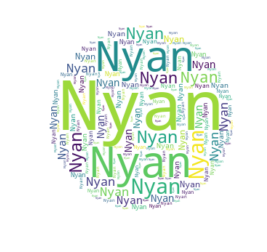

In [12]:
# 워드 클라우드 생성
# repeat=True : 같은 단어를 반복
# mask : 마스크 형태에 따라 단어 배치
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

# 이미지 출력
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()


<br>
<br>

# 텍스트에서 워드 클라우드 생성

In [13]:
# 현재 디렉토리 구함
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# 텍스트 로드
text = open(path.join(d, 'starwars.txt')).read()
print(text)




                                        STAR WARS

                                        Episode IV

                                        A NEW HOPE

                                         From the
                                  JOURNAL OF THE WHILLS

                                            by
                                       George Lucas

                                   Revised Fourth Draft
                                     January 15, 1976

                                      LUCASFILM LTD.

                

               A long time ago, in a galaxy far, far, away...

               A vast sea of stars serves as the backdrop for the main title. 
               War drums echo through the heavens as a rollup slowly crawls 
               into infinity.

                    It is a period of civil war. Rebel spaceships, 
                    striking from a hidden base, have won their first 
                    victory against the evil Galactic Empire.

 

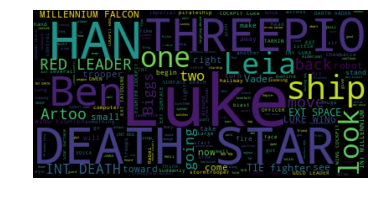

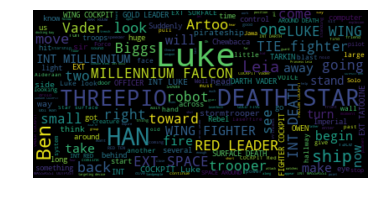

In [14]:
# 워드 클라우드 생성
wc = WordCloud().generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# 최대 폰트 크기 설정
wc = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


<br>
<br>

# 마스크 워드 클라우드

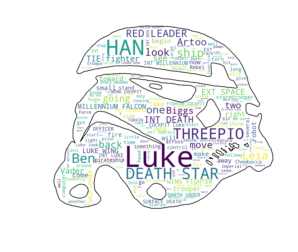

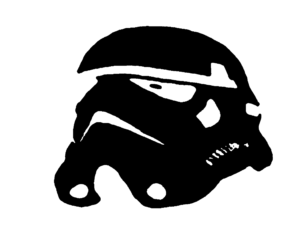

In [15]:
# 마스크 이미지 로드
mask = np.array(Image.open(path.join(d, "starwars_mask.png")))

# 워드 클라우드 설정
# contour_width : 윤곽선 두께
# contour_color : 윤곽선 색
wc = WordCloud(background_color="white", mask=mask, 
               contour_width=3, contour_color='black')

# 워드 클라우드 생성
wc.generate(text)

# 파일로 저장
wc.to_file(path.join(d, "starwars.png"))

# 이미지 표시
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


<br>
<br>

# 앨리스 예제

In [16]:
# 텍스트 로드
text = open(path.join(d, 'alice.txt')).read()
print(text)


Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'


In [17]:
# 마스크 이미지 로드
mask = np.array(Image.open(path.join(d, "alice_mask.png")))

# 워드 클라우드 내장 불용어
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

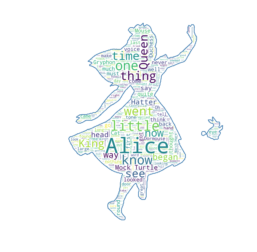

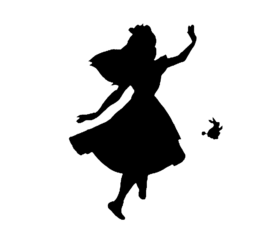

In [18]:
# 워드 클라우드 설정
wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# 워드 클라우드 생성
wc.generate(text)

# 파일로 저장
wc.to_file(path.join(d, "alice.png"))

# 이미지 표시
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


<br>
<br>

# 웹 크롤링 후 워드 클라우드 생성

In [19]:
import requests
import re
from bs4 import BeautifulSoup

# 방탄소년단 위키
base_url = 'https://namu.wiki/w/%EC%97%90%EB%B2%84%EA%B8%80%EB%A1%9C%EC%9A%B0'

# 웹페이지를 가져옴
req = requests.get(base_url)
html = req.content
html


b'<!DOCTYPE html>\n<html>\n<head>\n<title>\xec\x97\x90\xeb\xb2\x84\xea\xb8\x80\xeb\xa1\x9c\xec\x9a\xb0 - \xeb\x82\x98\xeb\xac\xb4\xec\x9c\x84\xed\x82\xa4</title>\n<meta charset="utf-8">\n<meta http-equiv="x-ua-compatible" content="ie=edge">\n<meta http-equiv="x-pjax-version" content="none">\n<meta name="generator" content="the seed">\n<meta name="application-name" content="\xeb\x82\x98\xeb\xac\xb4\xec\x9c\x84\xed\x82\xa4">\n<meta name="mobile-web-app-capable" content="yes">\n<meta name="msapplication-tooltip" content="\xeb\x82\x98\xeb\xac\xb4\xec\x9c\x84\xed\x82\xa4">\n<meta name="msapplication-starturl" content="/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8">\n<link rel="canonical" href="https://namu.wiki/w/%EC%97%90%EB%B2%84%EA%B8%80%EB%A1%9C%EC%9A%B0">\n<link rel="search" type="application/opensearchdescription+xml" title="\xeb\x82\x98\xeb\xac\xb4\xec\x9c\x84\xed\x82\xa4" href="/opensearch.xml">\n<link rel="copyright" href="//creativecommons.org/licenses/by-nc-sa/2.0/kr

In [20]:
# HTML 태그를 제거
text = BeautifulSoup(html, "lxml").text

# 기호 제거
text = re.sub('\\n', '', text)
text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]', '', text)
text


'에버글로우  나무위키최근 변경최근 토론특수 기능게시판작성이 필요한 문서고립된 문서분류가 되지 않은 문서편집된 지 오래된 문서내용이 짧은 문서내용이 긴 문서차단 내역RandomPage파일 올리기라이선스라이브랜덤채팅 채널전체 채널오늘의 라이브종합 헤드라인잡담 채널유머이슈 채널포인트 게임 채널사회 채널성소수자 채널게임 채널스포츠 채널도시·지리 채널2111841128Please login스킨 설정어두운 화면으로내 문서 기여 목록내 토론 기여 목록로그인최근 변경0000갱신중더 보기adsbygoogle  windowadsbygoogle  push헤드라인 최신글0000갱신중더 보기adsbygoogle  windowadsbygoogle  push2역링크토론편집역사ACL에버글로우최근 수정 시각 20190918 132337adsbygoogle  windowadsbygoogle  push분류에버글로우 \xa0 하위 문서 에버글로우활동 에버글로우음반 에버글로우V LIVE위에화 엔터테인먼트 코리아   열기  닫기  가수 유니크우주소녀형섭X의웅최예나에버글로우조승연 배우 이도현 이유시현 미아온다아샤이런   음반 목록  ARRIVAL OF EVERGLOW싱글 1집 20190318 HUSH싱글 2집 20190819  관련 문서 음반활동에픽로그V LIVE응원법에버글로우LAND싱글 2집 HUSH의 콘셉트 포토  왼쪽부터 온다 시현 이유 이런 아샤 미아  에버글로우  EVERGLOW그룹명에버글로우영문명EVERGLOW데뷔일2019년 3월 21일데뷔일로부터 182일째데뷔 앨범2019년 싱글 1집 ARRIVAL OF EVERGLOW 장르댄스소속사팬덤Forever포에버공식 SNS STAFF      1 개요2 멤버3 음반4 활동41 V LIVE42 데뷔 전43 2019년5 팬덤51 응원법6 트리비아61 멤버 간 케미1 개요편집Ready All Light 안녕하세요 에버글로우입니다2019년 3월 18일에 데뷔한 위에화엔터테인먼트 소속 대한민국의 6인조 걸그룹 위에화가 단독 런칭한 첫 번째 걸그룹이다팀명

In [21]:
from konlpy.tag import Okt

# 형태소분석기로 명사만 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(text)
nouns[:100]


['에버',
 '글',
 '로우',
 '나무',
 '위키',
 '최근',
 '변경',
 '최근',
 '토론',
 '특수',
 '기능',
 '게시판',
 '작성',
 '고립',
 '분류',
 '편집',
 '내용',
 '내용',
 '문서',
 '차단',
 '역',
 '파일',
 '리기',
 '라이선스',
 '라이브',
 '랜덤',
 '채팅',
 '채널',
 '전체',
 '채널',
 '오늘',
 '라이브',
 '종합',
 '헤드라인',
 '잡담',
 '채널',
 '유머',
 '이슈',
 '채널',
 '포인트',
 '게임',
 '채널',
 '사회',
 '채널',
 '성소수자',
 '채널',
 '게임',
 '채널',
 '스포츠',
 '채널',
 '도시',
 '지리',
 '채널',
 '스킨',
 '설정',
 '두운',
 '화면',
 '문서',
 '기여',
 '목록',
 '내',
 '토론',
 '기여',
 '목록',
 '로그인',
 '최근',
 '변경',
 '갱신',
 '더',
 '보기',
 '헤드라인',
 '최신',
 '글',
 '갱신',
 '더',
 '보기',
 '역',
 '링크',
 '토론',
 '편집',
 '역사',
 '에버',
 '글',
 '로우',
 '최근',
 '수정',
 '시각',
 '분류',
 '에버',
 '글',
 '로우',
 '하위',
 '문서',
 '에버',
 '글',
 '로우',
 '활동',
 '에버',
 '글',
 '로우']

In [22]:
# 배열을 텍스트로 변환
text = " ".join(nouns)
text


'에버 글 로우 나무 위키 최근 변경 최근 토론 특수 기능 게시판 작성 고립 분류 편집 내용 내용 문서 차단 역 파일 리기 라이선스 라이브 랜덤 채팅 채널 전체 채널 오늘 라이브 종합 헤드라인 잡담 채널 유머 이슈 채널 포인트 게임 채널 사회 채널 성소수자 채널 게임 채널 스포츠 채널 도시 지리 채널 스킨 설정 두운 화면 문서 기여 목록 내 토론 기여 목록 로그인 최근 변경 갱신 더 보기 헤드라인 최신 글 갱신 더 보기 역 링크 토론 편집 역사 에버 글 로우 최근 수정 시각 분류 에버 글 로우 하위 문서 에버 글 로우 활동 에버 글 로우 음반 에버 글 로우 위 화 엔터테인먼트 코리아 열기 가수 유니크 우주소녀 섭 의웅 최예나 에버 글 로우 승연 배우 이도현 이유 현 미아 아샤 음반 목록 싱글 집 싱글 집 관련 문서 음반 활동 에픽 로그 응원 법 에버 글 로우 싱글 집 의 콘셉트 포토 왼쪽 현 이유 아샤 미아 에버 글 로우 그룹 에버 글 우영 문명 데뷔 일 앨범 싱글 집 장르 댄스 소속사 팬덤 포에버 공식 개요 멤버 음반 활동 데뷔 전 팬덤 응원 법 트리비아 멤버 간 케미 개요 편집 에버 글 로우 데뷔 위 화 엔터테인먼트 소속 대한민국 인조 걸그룹 위 화가 단독 런칭 첫 걸그룹 팀 에버 글 로우 항상 합성어 태양 빛 날 밤 빛과 그림자 모두 우리 시간 신인 그룹 의지 에너지 로고 속 시그마 널리 더하기 기호 멤버 의미 델타 변화율 값 문자 멤버 변화 뜻 각기 다른 멤버 매력 하나 트렌디 감각 음악 다양성 추구 의미 집 의 공개 로고 양도 공개 멤버 편집 이름 본명 생년 월 포지션 국적 이유 박지원 리더 메인 래퍼 메인 댄서 현 김시현 리드보컬 미아 한은지 메인보컬 메인 댄서 림 서브보컬 아샤 허유 림 리드 래퍼 서브보컬 왕 서브보컬 음반 편집 내용 에버 글 로우 음반 문서 참고 활동 편집 내용 에버 글 로우 활동 문서 참고 편집 내용 에버 글 로우 문서 참고 데뷔 편집 싱글 집 음원 및 뮤직비디오 공개 라이브 홀 데뷔 쇼케이스 진행 뮤직비디오 자켓 촬영 현장 비

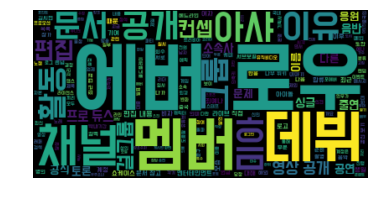

In [27]:
# 한글 폰트 경로
# font_path = path.join(d, 'BMDOHYEON_ttf.ttf')
font_path = 'C:/Users/ddongcom053/AppData/Local/Microsoft/Windows/Fonts/BMDOHYEON_ttf.ttf'

# 워드 클라우드 생성
wc = WordCloud(font_path = font_path).generate(text)

# 이미지 출력
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()
